# 同志與同性戀

In [32]:
import nltk
import re
import jieba
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

myfont = FontProperties(fname=r'/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline


pd.set_option('display.max_rows', 2000)

LGBTFAMILY_PATH = "line_sentence_lgbtfamily.txt"
LOVEFAMILY_PATH = "line_sentence_lovefamily.txt"

In [12]:
lgbtfamily_raw_text = ""
lovefamily_raw_text = ""

with open(LGBTFAMILY_PATH) as f:
    lgbtfamily_raw_text = f.read()

with open(LOVEFAMILY_PATH) as f:
    lovefamily_raw_text = f.read()

In [13]:
# 清除非中文字元
def _get_chinese(string):
    '''
    清除非中文字元
    input: str
    output: str
    '''
    filtrate = re.compile(u'[^\u4E00-\u9FA5]') # non-Chinese unicode range
    context = filtrate.sub(r'', string) # remove all non-Chinese characters
    return context

def _remove_stop_words(list_of_word):
    '''
    清除stop words
    input: list of string
    output: list of string
    '''
    stopWords=[]
    segments=[]
    remainderWords=[]

    # 讀入停用詞檔
    with open('stop_words.txt', 'r', encoding='UTF-8') as file:
        for data in file.readlines():
            data = data.strip()
            stopWords.append(data)

    remainderWords = filter(lambda a: a not in stopWords and a != '\n', list_of_word)
    return remainderWords
    

def generate_line_sentence(all_text, remove_stop_word=False, save_as_file=False, file_name=None):
#     all_text = ''.join([a['content'] for a in article_dict])
    
    # 以句號分句
    all_text = re.split('[。，！？!?,]', all_text)
    
    # 去除所有非中文字元
    all_text = [_get_chinese(s) for s in all_text]
    
    # 載入使用者字典
    jieba.set_dictionary('jieba_dict/dict.txt.big')
    jieba.load_userdict('jieba_dict/user_dict.txt')
    
    # 以jieba分詞
    cut_all_text = [jieba.lcut(sentence) for sentence in all_text]

    # 去除停用詞
    if remove_stop_word:
        text_with_stop_words_removed = [' '.join(_remove_stop_words(l)) for l in cut_all_text]
    
    # 存成檔案
    if save_as_file:
        with open(f'line_sentence_{file_name}.txt', 'w') as f:
            for s in text_with_stop_words_removed:
                f.write(s)
                f.write('\n')

    return cut_all_text

# generate line sentence format for the input of word2vec training
preprocessed_pro_lgbt_articles = generate_line_sentence(lgbtfamily_raw_text)
preprocessed_anti_lgbt_articles = generate_line_sentence(lovefamily_raw_text)

Building prefix dict from /Users/koukantou/Desktop/Don/ntu_master/107-2-lab-meeting/nano-blog/jieba_dict/dict.txt.big ...
Loading model from cache /var/folders/vp/g4gpl3x91qqdn6_x0t8w4bbc0000gn/T/jieba.u336b009ae6d5715d70945d8db9630e20.cache
Loading model cost 2.496 seconds.
Prefix dict has been built succesfully.
Building prefix dict from /Users/koukantou/Desktop/Don/ntu_master/107-2-lab-meeting/nano-blog/jieba_dict/dict.txt.big ...
Loading model from cache /var/folders/vp/g4gpl3x91qqdn6_x0t8w4bbc0000gn/T/jieba.u336b009ae6d5715d70945d8db9630e20.cache
Loading model cost 1.780 seconds.
Prefix dict has been built succesfully.


以下將利用 `nltk.text.Text` 的功能，先將文本實例化為 `Text` 類別的物件後，就可以利用 `nltk.text.Text` 這個類別已為我們實作好的很多方便功能，像是`Text.count()`(數語料中某詞出現的頻率) 和 `Text.concordance()`(給出某詞在語料中的concordance)。

要將文本丟入 `nltk.text.Text()`，首先需要將文本轉換成 list of list of word，也就是要先把文本拆成一句一句裝進`list`，然後每一句經過斷詞後再變成 list of word。

程式碼如下：

In [111]:
# 將文本轉換成 nltk.text.Text 可以接收的模式
lgbtfamily_word_list = [y for x in preprocessed_pro_lgbt_articles for y in x]
lovefamily_word_list = [y for x in preprocessed_anti_lgbt_articles for y in x]
print(lgbtfamily_word_list)
# 轉換好後，丟入 nltk.text.Text
lovefamily_text = nltk.text.Text(lovefamily_word_list)
lgbtfamily_text = nltk.text.Text(lgbtfamily_word_list)

['人權', '到底', '要', '無限', '上綱', '到', '什麼', '地步', '加拿大', '一位', '曾經', '遭到', '性侵', '的', '女子', '住進', '多倫多', '一家', '臨時', '收容所', '發現', '她', '的', '室友', '是', '一名', '男跨', '女', '的', '跨性別', '者', '她', '擔心', '會', '再次', '受到', '性侵', '甚至', '會', '出現', '創傷', '後', '壓力', '症候群', '症狀', '然而', '她', '提出', '反映', '卻', '被', '反指', '是', '歧視', '言論', '可能', '還會', '因此', '吃上官司', '據', '國家', '報', '報導', '歲', '女子', '漢娜', '近日', '向', '安大略省', '人權', '仲裁', '處', '提出', '申訴', '指', '她', '日前', '入住', '的', '臨時', '收容所', '的', '工作人員', '月', '強迫', '她', '與', '一名', '生理', '男', '的', '跨性別', '者', '同住', '一室', '甚至', '告訴', '她', '想', '辦法', '適應', '不然', '就', '搬走', '由於', '漢娜', '曾經', '遭到', '性侵', '與', '生理', '男同', '住', '一度', '讓', '她', '出現', '了', '症狀', '漢娜', '解釋', '自己', '的', '焦慮', '並非', '空空', '來風', '因', '這這名', '男', '跨', '女', '的', '跨性別', '者', '曾', '與', '她', '提到', '自己', '與', '女性', '結婚', '過', '而且', '還有', '一名', '懷孕', '的', '未婚妻', '而且', '還', '時不時', '透露', '對', '其他', '女子', '的', '欣賞', '還', '強調', '自己', '獨鐘', '拉丁', '裔', '女子', '因為', '她們', '特別', '性感', '雖然', '與', '對方', '才'

In [15]:
help(nltk.text.Text.concordance)

Help on function concordance in module nltk.text:

concordance(self, word, width=79, lines=25)
    Prints a concordance for ``word`` with the specified context window.
    Word matching is not case-sensitive.
    
    :param word: The target word
    :type word: str
    :param width: The width of each line, in characters (default=80)
    :type width: int
    :param lines: The number of lines to display (default=25)
    :type lines: int
    
    :seealso: ``ConcordanceIndex``



## 比較「同志」和「同性戀」出現在兩方語料中的頻率

`nltk.text.Text.count()` 這個方法接收一個字串參數，會回傳給你改文本中出現該詞的頻率數量。讓我們看一下 `nltk.text.Text.count()` 的文件：

In [16]:
help(nltk.text.Text.count)

Help on function count in module nltk.text:

count(self, word)
    Count the number of times this word appears in the text.



接著用上面已經做好的兩個`Text`物件，來看「同志」和「同性戀」這兩詞出現的頻率。

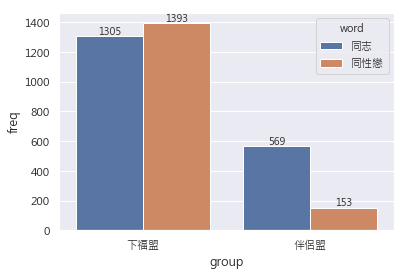

In [110]:
# 下福盟語料中出現的「同志」次數
lovefamily_tongzhi = lovefamily_text.count('同志')

# 伴侶盟語料中出現的「同志」次數
lgbtfamily_tongzhi = lgbtfamily_text.count('同志')

# 下福盟語料中出現的「同性戀」次數
lovefamily_tongxinglian = lovefamily_text.count('同性戀')

# 伴侶盟語料中出現的「同性戀」次數
lgbtfamily_tongxinglian = lgbtfamily_text.count('同性戀')

# 轉換成方便做圖的 DataFrame
df = pd.DataFrame([
    {
    "word": "同志",
    "freq": lovefamily_tongzhi,
    "group": "下福盟"
    },
    {
    "word": "同性戀",
    "freq": lovefamily_tongxinglian,
    "group": "下福盟"
    },
    {
    "word": "同志",
    "freq": lgbtfamily_tongzhi,
    "group": "伴侶盟"
    },
    {
    "word": "同性戀",
    "freq": lgbtfamily_tongxinglian,
    "group": "伴侶盟"
    },
])

# 使用 seaborn 作圖
barplot = sns.barplot(x="group", y="freq", hue="word", data=df)

# 在每個 bar 上加入總數
for p in barplot.patches:
    barplot.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 10,
        int(p.get_height()),
        ha="center")

In [35]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.00,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [29]:
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family())) 

'/Library/Fonts/Arial.ttf'

In [60]:
import matplotlib 
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

由上圖可以看出，在下福盟的語料中，「同志」與「同性戀」兩詞出現的頻率不相上下，「同性戀」出現的次數略高於「同志」。但在伴侶盟的語料中，「同性戀」一詞(153次)的頻率遠低於「同志」(569次)，這不禁讓人好奇，下福盟中的平均出現以及伴侶盟中的懸殊差距究竟意味著什麼。

day              Fri
total_bill    325.88
tip            51.96
size              40
Name: 0, dtype: object
0
51.96
day              Sat
total_bill    1778.4
tip            260.4
size             219
Name: 1, dtype: object
1
260.4
day               Sun
total_bill    1627.16
tip            247.39
size              216
Name: 2, dtype: object
2
247.39000000000007
day              Thur
total_bill    1096.33
tip            171.83
size              152
Name: 3, dtype: object
3
171.83


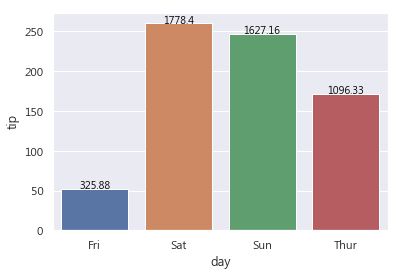

In [67]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df=pd.read_csv("https://raw.githubusercontent.com/mono0926/python-for-data-analytics/master/ch08/tips.csv", sep=',')
groupedvalues=df.groupby('day').sum().reset_index()
g=sns.barplot(x='day',y='tip',data=groupedvalues)
for index, row in groupedvalues.iterrows():

    
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

## 同志
### 下福盟中的「同志」

In [8]:
lovefamily_tongzhi_c = lovefamily_text.concordance_list('同志', width=50, lines=10000)

pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lovefamily_tongzhi_c],
    "query": '同志',
    "right_context": [' '.join(line.right) for line in lovefamily_tongzhi_c],
})

ff = nltk.probability.FreqDist([line.left[-1] for line in lovefamily_tongzhi_c])
ff.tabulate()

   的   台灣    在   認識    女    年    對   實施    是    及    之    後   保障   對於    了   教育    被   一個   支持    為    與   尊重   友善   很多   其他    把    二   反對    將  臺北市   涵蓋   學校   台北   就是   推動    說   發言    有   知道    若   推廣   成為   發現    當    一   教導   那些    直    讓   關於   鼓勵    上   高雄   今年    但    五   質疑   接受   提醒    從    而   報導   再給   許多    到   顯示   聖誕   歡迎   使用   包含    和   禁止   剝奪   但是   並無    向   學習    幫    前    呢   認為   明白    中   一對    嗎   去年   新聞   撕裂   部分    跟   孩子   參與   贊成 同性婚姻    以    反  年月日   問題   校園    或   整個   了解    由   晚會   爭取    則    你    非   轟淪   左袒   來自    無   來說   發表   公佈   出現    帶   利用   這類   一些    談   主流   觀察    該   受到   少數   現在   團體   所以   打壓   歧視   為何   單一   國際    過   裡的   中小   以及   每年    四   宣稱  中小學   散佈   婚姻   拒絕   因此    淩   解決   不是   獨厚   只有   如果   而且   這是   因為   指出   所謂   影響    種   有些   扮裝   提高    進   男女   第頁   此刻   去過   判斷   散播   立場   目前   宣傳   推行   面對   幫助    教   進入    做   引起   沒有   彩虹   前述   施以   北市   有損   使得   看到   姊妹   原來   荷蘭   陽光   呈現   前往   符合   理由  下一代   譯成   廣大   製造   我們 

### 伴侶盟中的「同志」

In [9]:
lgbtfamily_tongzhi_c = lgbtfamily_text.concordance_list('同志', width=50, lines=10000)

pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lgbtfamily_tongzhi_c],
    "query": '同性戀',
    "right_context": [' '.join(line.right) for line in lgbtfamily_tongzhi_c],
})

f = nltk.probability.FreqDist([line.left[-1] for line in lgbtfamily_tongzhi_c])
f.tabulate()

   的    女    對    讓   保障    是   禁止   實施    之    將   支持   對於   香港   反對    為    反    與   還給    把   男女    了   力挺   台灣    和    在   允許   參加    有   施行    教   我們   出櫃   歧視    化    而   推動   不是   許多   造成   利用  舊金山   教育   這對   只是   所謂   教導   因為   友善   排除   出對    但   拒絕   看到  青少年    當    由   報導   承認   對此   提供   變成   意味   修法   成立    及   強調   給予   這是   認識   參與    說   剝奪   過去   踐踏   捍衛   有關   東京   聽見   眾多   研究   靠攏   重申   刪除   一項   時報   即女   主持   描述   尊重   廣告   設有   該國   招標   阻擋   只限   第個   表示   出現    成    年   市府   接納 一男一女   影響   提及   北京   肯定    來   坦誠   告訴   關於   期間   沒有    連   氛圍   林悅  歸屬感   關係    個   顯示   聲稱   接受  這既非   是將   港澳   澳門   當地   轉介   連結    靠    直   一場   主打   亮出   分析   善用   台北   鄉下    以   父母   鼓勵   以為   發出   亞洲   侵犯   一名    如   很多  是不是   瓜代   提升  公聽會   堅持   目前   針對  第一個   所有    到   當中   實踐   上將   看待    跟   一家   遭到   說過    好   每次   北區   多個  新竹市 鄰近地區   期望    且   婦女   國際   基礎    著    其   侵害    嗎   解決   恢復   因此   其實   還要   今天   不讓   納入   這些   代替   同志   妨礙   排擠   削減   迫害    呢  釋憲案   文宣    撐 

## 「同性戀」
### 下福盟中的「同性戀」

In [45]:
lovefamily_tongxinglian_c = lovefamily_text.concordance_list('同志', width=50, lines=10000)

p = pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lovefamily_tongxinglian_c],
    "query": '同志',
    "right_context": [' '.join(line.right) for line in lovefamily_tongxinglian_c],
})

ff = nltk.probability.FreqDist([line.left[-1] for line in lovefamily_tongxinglian_c])
ff.
# p[p.left_context.str.endswith("鼓勵")]

理由
顯示
聖誕
的
直
晚會
歡迎
很多
及
實施
使用
爭取
一個
讓
保障
關於
下一代
之
支持
譯成
年
鼓勵
廣大
則
了
包含
製造
我們
變成
你
對於
非
轟淪
教育
涵蓋
第條
上
開
施行
尊重
左袒
吹捧
發言
昨日
有
高雄
和
熱衷於
來自
代表
知道
新聞稿
觸法
另一方面
其他
禁止
剝奪
治療
在
台灣
但是
今年
性命
是
但
貼近
信箱
八種
還是
老年
那麼
貧窮
五
指
女
質疑
對待
凸顯
導致
並無
無
有教
有利於
性解放
針對
主張
來說
投書
關係人
若
發表
同性伴侶
建議
接受
向
義務
學校
公佈
學習
出現
青少年
帶
幫
包裝
叮嚀
利用
潮
台北
大陸
前
這類
開辦
辦
一些
十多個
把
盡是
友善
為
重重的
對
推廣
是不是
談
與
成為
呢
主流
後
觀察
發現
該
受到
提醒
當
被
認為
從
性女
兩位
韓森
而
二
明白
即
設
少數
現在
深愛
報導
美化
團體
通過
法
所以
至於
打壓
撰寫
中
一對
歧視
嗎
位
就是
尊崇
犧牲
具備
為何
原本
侵蝕
單一
這些
反對
至
歷屆
去年
認識
新聞
再將
撕裂
再給
一
國際
部分
自
一文
注目
同光
推動
討論
過
跟
對話
之外
十對
裡的
可是
有關
覺得
日
中小
教育法
孩子
以及
保護
若問
說
換成
參與
自由
某某
這在
教導
唯獨
每年
同志
贊成
其次
書籍
丁凡譯
形成
激進
舉辦
公開
大會
麻州
提供
容忍
四
宣稱
同性婚姻
中小學
廢婚
將
散佈
改變
贊同
其中
之後
許多
目標
運動
其實
不少
贈與
稅率
婚姻
不動產
再者
拒絕
判給
婦女
帶入
混入
害
可謂
傷害
拿
以
虐待
夏林清
接觸
若不教
因此
淩
解決
不是
獨厚
只有
加入
身為
脫離
如果
懷疑
七
到
而且
懼於
資訊
比
這是
三
脆弱
名
造成
方面
位由女
因為
以為
甚至
研究成果
三女
論點
關注
的確
指出
所謂
天淵之別
遺憾
化
職員
反
網路
入班教
以下
學生
奇裝異服
訴求
澄清
當做
影響
種
有些
扮裝
那些
提高
進
男女
第頁
此刻
年月日
第屆
去過
來到
判斷
內容
鼓譟
敘述
散播
目的
既然
協助
斡旋
力挺
挺
證明
平等
明確
包括
變性
以來
發聲
立場
之實
目前
權益
時

### 伴侶盟中的「同性戀」